# Лабораторная работа номер 7
Предмет: Компьютерная геометрия
Студент: Подмогильный Иван Александрович


In [104]:
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from math import comb, factorial

# Задание №1
Реализуйте алгоритм вычисления контрольных точек для кривой Безье третьего порядка. Сам
алгоритм изложен в презентации. Для проверки алгоритма постройте кривую, изображенную в презентации.  

Для лучшего понимания, покажем все детали формулы радиус-вектора кривой Безье:

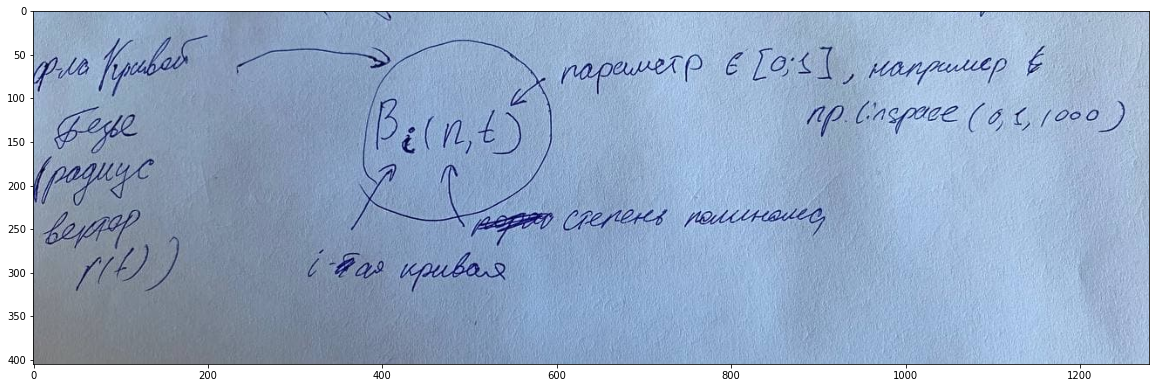

In [109]:
img = mpimg.imread("1.jpg")

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.imshow(img)

## Перейдем к реализации:

In [110]:
def calculate_intermediate_points(p1, p4):

    N = len(p1)
    m1 = np.array([[]])
    m2 = np.array([])
    
    first_row = np.zeros(N)
    first_row[0] = 2
    first_row[1] = 1
    
#     print(p1[0] + 2 * p1[1])
    first_el = p1[0] + 2 * p1[1]
    
    m1 = np.append(m1, first_row)
    m2 = np.append(m2, first_el)
#     print(m2.shape)
    
    # N-1 is not included in Python, that's why we write "N-1"
    for i in range(1, N-1):
        current_row = np.zeros(N)
        current_row[i-1] = 1
        current_row[i] = 4
        current_row[i+1] = 1
        
        m1 = np.vstack( (m1, current_row) )
        m2 = np.vstack( (m2, 4 * p1[i] + 2 * p1[i+1]) ) 
        
    
    last_row = np.zeros(N) 
    last_row[-1] = 7
    last_row[-2] = 2
    
    m1 = np.vstack( (m1, last_row) )
    # Учитывая что b(n-1) = a(n), в формуле  8a(n-1) + a(n), заменим a(n) на b(n-1), то есть p4 (1)
    m2 = np.vstack( (m2, 8 * p1[-1] + p4[-1]) )
    print(m1, "\n", "\n", m2)
    
    p2 = np.linalg.solve(m1, m2)
    
    p3 = np.zeros((N, 2))
    
    for i in range(N-1):
        p3[i] = 2 * p1[i+1] - p2[i+1]
        
    print("\n", p3)
    
    # Формула в презентации выглядит как 1/2*(u(n-1) + a(n)), где u - это p2, a - это p1, но здесь делаем также
    # как и в (1). 
    p3[-1] = 1 / 2 * (p2[-1] + p4[-1])
    
    return p2, p3


# ----- Copied from the lab 6 for the check of the algorigthm. -----
def bezier(points):
    n = len(points)
    fragm = 400
    functions = berns_functions(n-1, fragm=400)
    # print(len(functions))
    
    spline = np.zeros((fragm, 2))
    expanded_points = np.ones((fragm, 2))
    
    for i in range(n):
#         print(functions[i].shape)
#         print(points[i].shape)
#         print(functions[i])
#         print(points[i])
        
        points_i = expanded_points * points[i]
        spline += (functions[i] * points_i.T).T
        
    
    return spline


# Let's modify a bit function draw_berns. We will need it in the ex.2
def berns_functions(n, figsize=None, fragm=400):
    size = figsize if figsize is not None else (10, 10)
    assert type(size) == tuple, "Sorry, parameter figsize accepts only tuple, example (10, 10)"
    
    t = np.linspace(0, 1, fragm)

    list_of_berns_polynoms = []
    
    # Для каждого n соберём полином
    for i in range(n+1):
        berns = np.array([])
        for ti in t: 
            berns = np.append(berns, B(n, i, ti))
        list_of_berns_polynoms.append(berns)
    
    return list_of_berns_polynoms


def B(n, i, t):
    return comb(n, i) * (1 - t)**(n - i) * t**i 

In [80]:
points = np.array([ [1, 1], [1, 2], [2, 2], [2, 1], [1, 1] ])
p1 = points[:-1]
p4 = points[1:]
# print(p1)
# print(p4)

p2, p3 = calculate_intermediate_points(p1, p4)

[[2. 1. 0. 0.]
 [1. 4. 1. 0.]
 [0. 1. 4. 1.]
 [0. 0. 2. 7.]] 
 
 [[ 3.  5.]
 [ 8. 12.]
 [12. 10.]
 [17.  9.]]

 [[0.78571429 1.78571429]
 [1.75       2.25      ]
 [2.21428571 1.21428571]
 [0.         0.        ]]


In [81]:
print(p1, "\n")
print(p2, "\n")
print(p3, "\n")
print(p4)


[[1 1]
 [1 2]
 [2 2]
 [2 1]] 

[[0.89285714 1.39285714]
 [1.21428571 2.21428571]
 [2.25       1.75      ]
 [1.78571429 0.78571429]] 

[[0.78571429 1.78571429]
 [1.75       2.25      ]
 [2.21428571 1.21428571]
 [1.39285714 0.89285714]] 

[[1 2]
 [2 2]
 [2 1]
 [1 1]]


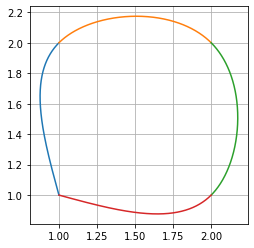

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_aspect("equal")

for i in range(len(p2)):
    arg = np.array([p1[i], p2[i], p3[i], p4[i]])
    spline = bezier(arg)
    ax.plot(spline[:, 0], spline[:, 1])

# Задание № 2 
С помощью рациональной кривой Безье 2-го порядка нарисуйте полную окружность. В презентации нарисована только дуга окружности из первой четверти. Нужно дорисовать дуги из 2, 3 и 4
четвертей.

In [93]:
def rational_bezier(t, points, w=None):
    if w is None:
        w = np.ones(n)
    
    curve = 0
    n = len(points)
    expanded_points = np.ones((len(t), 2))
    
    for i in range(n):
        # TODO: fix the error
        point_i = expanded_points * points[i] 
        curve += (R(n, i, t, w) * point_i.T).T
        
    return curve
    

def R(n, i, t, w):
    """
    w has to be the list of len() same as n
    """
    den = 0
    
    for j in range(n):
        den += B(n, j, t) * w[j]
        
    return B(n, i, t) * w[i] / den

In [94]:
t = np.linspace(0, 1, 1000)
points_test = np.array([ [1, 1], [2, 3], [5, 4], [4, 1] ])
points = np.array([ [1, 0], [1, 1], [0, 1] ])
w = [1, 1, 2]

In [95]:
curve = rational_bezier(t, points, w)

/tmp/ipykernel_267786/1195454356.py:26: RuntimeWarning: invalid value encountered in true_divide
  return B(n, i, t) * w[i] / den


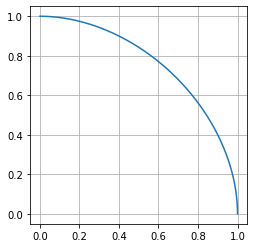

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
ax.grid()

ax.plot(curve[:, 0], curve[:, 1])

In [98]:
points1 = points
points2 = np.array([ [0, 1], [-1, 1], [-1, 0] ])
points3 = -points1
points4 = -points2

In [100]:
curve1 = rational_bezier(t, points1, w)
curve2 = rational_bezier(t, points2, w)
curve3 = rational_bezier(t, points3, w)
curve4 = rational_bezier(t, points4, w)

/tmp/ipykernel_267786/1195454356.py:26: RuntimeWarning: invalid value encountered in true_divide
  return B(n, i, t) * w[i] / den


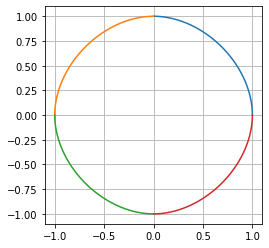

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
ax.grid()

ax.plot(curve1[:, 0], curve1[:, 1])
ax.plot(curve2[:, 0], curve2[:, 1])
ax.plot(curve3[:, 0], curve3[:, 1])
ax.plot(curve4[:, 0], curve4[:, 1])